                                 Landsat-8, Pre-processing and Machine Learning Workflow  

                                        Earth2Orbit Consulting Pvt Ltd, Bangalore                                                             
                                                                                                              
                                   80 Edifice, 80 Feet Rd, HAL 2nd Stage, Kodihalli, 
                                         Bengaluru, Karnataka 560038                           
                    Phone:Susmita Mohanty (CEO): 8105600355, Amardeep Sibia (CTO): 7760984777 
                    e-mail: susmita@earth2orbit.com, amardeep@earth2orbit.com, 
                                        Web: www.earth2orbit.com             
                                                                                                              
                          (c) 2016 by Earth2Orbit Consulting Pvt Ltd, Bangalore, All Rights Reserved   

Type        :   Jupyter Notebook                                                                                      
                                                                                                            
Cirulation  :   Confidential                                                                
                                                                                                             
Purpose     :   Automated Workflow for Pre-Processing & Clustering of Landsat-8 imagery                          
                                                                                                            
Version     :   6.0                                                                                          
                                                                                                             
Remarks     :  


                                                                                                              
Syntax         :   <output = functionName(input)>                                                                 
                                                                                                              
I N P U T S    :             Description                                     Type        Dim     Unit        
                                                                                                                
D A T A        :             Description                                     Type        Dim     Unit

O U T P U T S  :             Description                                     Type        Dim     Unit      
                                                                                                                                                                                                      

A U T H O R                  D A T E                     D E S C R I P T I O N 

Shabarinath S Nair                                       User Defined Inputs, Pre-Processing
....                                                     Initialize libraries and Read Image
....                                                     Create RGB composite
Adhithya Rajan                                           Pansharpening
Shabarinath S Nair                                       Histogram Equalization
....                                                     Color and Brightness Adjustment 
....                                                     Top of the Atmosphere Reflectance
....                                                     NDVI Calculation
....                                                     Pan-sharpened NDVI Calculation
Adhithya Rajan                                           Plot Histogram equalized
Shabarinath S Nair                                       Plot NDVI
Adhithya Rajan                                           Plot Pan-sharpened
Shabarinath S Nair                                       Plot Pan-sharpened NDVI
....                                                     MAIN PROGRAM, Pre-processing 
Adhithya Rajan                                           K-Means Clustering
Shabarinath S Nair                                       Fuzzy C-Means Clustering
....                                                     Gaussian Mixture Model
....                                                     MAIN PROGRAM, Unsupervised Clustering

### Download Landsat-8 Image

### Read Landsat-8 Image

### User Defined Inputs, Pre-Processing

In [1]:
#LC81450492016039LGN00
#Bellary

#LC81480472016076LGN00
#Mumbai

#LC81440512016016LGN00
#Bangalore

#LC81420512015287LGN00
#Chennai

# Enter Place Name

place_name= 'Mumbai'


img_id='LC81480472016076LGN00'

# Enter Image directory

dir_name='C:\Users\Shabarinath\Desktop\New folder\Mumbai\LC81480472016076LGN00'

# Enter Plot Save directory

image_save_dir='C:\Users\Shabarinath\Desktop\New folder\Plots'

# Meta Data File Name

met_file_name= img_id+'_MTL.txt'

# Choose ROI, Columns & Rows

'''
# Bellary

y1=2500
y2=5500
x1=3000
x2=6000     

# Bangalore
y1=2500
y2=5500
x1=3000
x2=6000

#Chennai
y1=3000
y2=6000
x1=2000
x2=5000
'''

#Mumbai
y1=2000
y2=4000
x1=4000
x2=6000
 

In [2]:
# Initialize libraries

import os
import re
import numpy as np
import skimage
from skimage import io, exposure
import matplotlib.pyplot as plt
import matplotlib.image as imgm

os.chdir(dir_name)
imagedir=os.getcwd()

# READ LANDSAT-8 IMAGE

def read_band(n):
    if n in range(1, 12): # available number of bands in the Landsat8
        
            band_name = 'B' + str(n) + '.TIF' # Create band name for searching
        img_idx = [idx for idx, band_string in enumerate(os.listdir(imagedir)) if band_string.endswith(band_name)] # get the index of the required band
        img =imgm.imread(os.listdir(imagedir)[img_idx[0]])# read this image
        #img = io.imread(os.listdir(imagedir)[img_idx[0]])
        return img  
    else:
        print('Band number has to be in the range 1-11!') # re-run the loop

### Create RGB Composite

In [3]:

def create_composite(img_1,img_2,img_3):
    
    img_dim = img_1.shape
    img = np.zeros((img_dim[0], img_dim[1], 3))
    img[:,:,0] = img_1
    img[:,:,1] = img_2
    img[:,:,2] = img_3
    
    return (img)



### Pansharpening
1. Select ROI
2. Calculate maximum value of each band
3. Crop the image
4. Normalize the bands
5. Rescale the image
6. Apply Brovey Transformation, Pansharpening
7. Plot the Pansharpened image

In [4]:
# 1. SELECT ROI, PRE-PANSHARPENING IMAGE

def pan_sharpen(img_1, img_2, img_3, img_4):
    
    b1=img_1
    b2=img_2
    b3=img_3
   
    b4=img_4
    
    from skimage import transform

    img432_roi = create_composite(b1, b2, b3)

    # 2. CALCULATE MAX VALUE OF EACH BAND
    
    max_1 = b1.max()
    max_2 = b2.max()
    max_3 = b3.max()
    
    max_4 = b4.max()

    # 3. CROP THE IMAGE

    b1_c = np.array(b1,dtype='float64')
    b2_c = np.array(b2,dtype='float64')
    b3_c = np.array(b3,dtype='float64')
    
    b4_c = np.array(b4,dtype='float64')

    # 4. NORMALIZE THE BANDS

    b1_n = b1_c/max_1
    b2_n = b2_c/max_2
    b3_n = b3_c/max_3
   
    
    b4_n = b4_c/max_4

    # 5. RESCALE THE IMAGE
    
    img432 = create_composite(b1_n, b2_n, b3_n)
    img432_2x  = transform.rescale(img432 , 2)

    # 6. APPLYING BROVEY TRANSFORMATION, PANSHARPENING

    m = np.sum(img432_2x, axis=2)
    ps1= b4_n*img432_2x[:, :, 0]/m
    ps2= b4_n*img432_2x[:, :, 1]/m
    ps3= b4_n*img432_2x[:, :, 2]/m
    img432_ps= create_composite(ps1, ps2, ps3)
    
    return img432_roi, img432_ps, ps1, ps2, ps3

### Histogram Equalization

In [5]:
# Histogram equalization

def hist_equalization(img):

    img_rgb_432_2=img

    for color, channel in zip('rgb', np.rollaxis(img_rgb_432_2, axis=-1)):
        counts, centers = exposure.histogram(channel)

    img432_ha = np.empty(img_rgb_432_2.shape)
    lims = [(7100,14500), (8200, 14000), (9200,13500)]
    for lim, channel in zip(lims, range(3)):
        img432_ha[:, :, channel] = exposure.rescale_intensity(img_rgb_432_2[:, :, channel], lim)

    return img432_ha

### Color and Brightness Adjustment

In [6]:
def col_bri_adjustment(img):
    
    img432_ha=img
    
    img432_ha[:, :, 1] = exposure.adjust_gamma(img432_ha[:, :, 1], 0.65) # adjust gamma exposure
    img432_ha[:, :, 2] = exposure.adjust_gamma(img432_ha[:, :, 2], 0.75) # adjust gamma exposure
    
    return img432_ha


### Top of Atmosphere Reflectance


In [7]:
def get_gain_bias_angle(n):
    
    if n in range(1, 10): # search the 'operational land imager' bands
        n_str = str(n) # get band number as string
        s_g = 'REFLECTANCE_MULT_BAND_' + n_str + ' = ' # create the 'gain' search string
        s_b = 'REFLECTANCE_ADD_BAND_' + n_str + ' = ' # create the 'bais' search string
    
        #f=open('LC81450492016039LGN00_MTL.txt', 'r+') # open metadata file for reading and writing
        
        f=open(met_file_name, 'r+') # open metadata file for 
        search_str_g = '(?<=' + s_g + ').*' # match if preceded by 'gain' search string
        search_str_b = '(?<=' + s_b + ').*' # match if preceded by 'bais' search string
        search_str_a = '(?<=' + 'SUN_ELEVATION = ' + ').*' # match if preceded by 'sun angle' search string
    
        for line in f:
            s0 = re.search(search_str_a, line) # search for 'gain value'
            s1 = re.search(search_str_g, line) # search for 'bais value'
            s2 = re.search(search_str_b, line) # search for 'sun angle value'
            if s0:
                angle = float(s0.group(0)) # extract 'sun angle value'
            elif s1:
                gain = float(s1.group(0)) # extract 'gain value'
            elif s2:
                bias = float(s2.group(0)) # extract 'bias value'
    
        f.close()
    
        return gain, bias, angle  # return the gain, bias & sun angle value
    else:
        print('Band number has to be in the range 1-9!') # out of range print

In [8]:
def image_adjust_brightness(img, limit_left, limit_right, limit_left_out,limit_right_out, color_map, title):
  
    img_ha = exposure.rescale_intensity(img, (limit_left, limit_right), (limit_left_out,limit_right_out))
    
    return img_ha

### NDVI Calculation

In [9]:
def ndvi_calc(img_1,img_2):
   
    
    b5_ndvi=img_1
    b4_ndvi=img_2
    
    # Determine Gain, Bias & Sun-angle

    b4_gain, b4_bias, angle = get_gain_bias_angle(4) # Get the gain, bais & sun elevation angle for the red band
    b5_gain, b5_bias, angle = get_gain_bias_angle(5) # Get the gain, bais & sun elevation angle for the blue band

    # Calculate Top of the Atmosphere corrected reflectance

    b4_toa_refl  = (b4_gain * b4_ndvi + b4_bias) / np.sin(angle) # Calculate TOA  for red band
    b5_toa_refl  = (b5_gain * b5_ndvi + b5_bias) / np.sin(angle) # Calculate TOA  for blue band

    # Calculate Normalized Difference Vegetation Index

    ndvi = (b5_toa_refl- b4_toa_refl) / (b5_toa_refl + b4_toa_refl)
    error_indices=np.where(np.logical_or(ndvi>=1, ndvi<=-1))
    ndvi[error_indices]=0
    
    img_ndvi_rescaled=image_adjust_brightness(ndvi, np.amin(ndvi), np.amax(ndvi),0,1,'OrRd', 'NDVI')
    
    return ndvi

### Pansharpened NDVI

In [10]:
def pan_sharpened_ndvi(img_1,img_2,img_3,img_4):
    
     
    img432_roi,img432_ps_p_ndvi, ps5, ps4, ps3=pan_sharpen(img_1, img_2, img_3, img_4)

    ndvi_p=ndvi_calc(ps5, ps4)
    
    img_ndvi_rescaled_p=image_adjust_brightness(ndvi_p, np.amin(ndvi_p), np.amax(ndvi_p),0,1,'OrRd', 'NDVI')
    
    return ndvi_p

### PLOT 

In [11]:
# Reading the Time and Date of Image
from pylab import *

f = open(met_file_name,"r") 
lines = f.readlines() 
dateLine = lines[5]

print (dateLine)

dateTime = dateLine.split('=')[1]
imageDate = dateTime.split('T')[0]
imageTime = dateTime.split('T')[1]
imageTime = imageTime.split('Z')[0]

print (dateTime, imageDate, imageTime)

    FILE_DATE = 2016-05-03T09:14:31Z

(' 2016-05-03T09:14:31Z\n', ' 2016-05-03', '09:14:31')


### Plot Histogram Equalized

In [12]:
def plt_hist_eq(img_1,img_2):
        
    %matplotlib inline
    img432_roi=img_1
    img432_ha=img_2
    plotTitle = place_name + '\n' + imageDate + '  , ' + imageTime
    fig = plt.figure(figsize=(16, 8))
    fig.set_facecolor('white')
    fig.suptitle(plotTitle, fontsize = 18)
    
    ax1 = fig.add_subplot(121)
    ax1.imshow(img432_roi/65535)
    plt.title('Raw Data')
    plt.axis('off')

    ax2=fig.add_subplot(122)
    ax2.imshow(img432_ha)
    plt.title('Histogram Equalized, RGB')
    plt.axis('off')
    #plt.show()
    plt.savefig(image_save_dir +'\\'+ place_name + '_'+ 'HE_'+imageDate +'_L8' +'.tiff',format='tiff', dpi=300) 
    plt.savefig(image_save_dir +'\\'+ place_name + '_'+ 'HE_L'+imageDate +'_L8' +'.tiff',format='tiff')

### Plot NDVI

In [13]:
def plt_ndvi(img_1,img_2,img_3):
    
    %matplotlib inline
    img432_roi=img_1
    img432_ha=img_2
    img_ndvi_rescaled=img_3
    
    plotTitle = place_name + '\n' + imageDate + '  , ' + imageTime
    fig = plt.figure(figsize=(16, 8))
    fig.set_facecolor('white')
    fig.suptitle(plotTitle, fontsize = 18)
    
    ax1 = fig.add_subplot(131)
    ax1.imshow(img432_roi/65535)
    plt.title('Raw Data')
    plt.axis('off')

    ax2=fig.add_subplot(132)
    ax2.imshow(img432_ha)
    plt.title('Histogram Equalized, RGB')
    plt.axis('off')

    img_ndvi_rescaled=image_adjust_brightness(ndvi, np.amin(ndvi), np.amax(ndvi),0,1,'OrRd', 'NDVI')

    ax2=fig.add_subplot(133)
    ax2.imshow(img_ndvi_rescaled)
    plt.title('NDVI')
    plt.axis('off')

    #plt.show()
    plt.savefig(image_save_dir +'\\'+ place_name + '_'+ 'NDVI_'+imageDate +'_L8' +'.tiff',format='tiff', dpi=300) 
    plt.savefig(image_save_dir +'\\'+ place_name + '_'+ 'NDVI_L'+imageDate +'_L8' +'.tiff',format='tiff') 

### Plot Pansharpened

In [14]:
def plt_pan_sharpen(img_1,img_2):
    
    %matplotlib inline
    img432_roi=img_1
    img432_ps=img_2

    img432_roi_en=image_adjust_brightness(img432_roi, np.amin(img432_roi), np.amax(img432_roi),0,1,'OrRd', 'EN')

    img432_ps_en=image_adjust_brightness(img432_ps, np.amin(img432_ps), np.amax(img432_ps),0,1,'OrRd', 'PS')
    
    plotTitle = place_name + '\n' + imageDate + '  , ' + imageTime
    fig = plt.figure(figsize=(16, 8))
    fig.set_facecolor('white')
    fig.suptitle(plotTitle, fontsize = 18)
    
    ax2 = fig.add_subplot(121)
    ax2.imshow(img432_roi_en)
    plt.title('Raw Data')
    plt.axis('off')

    ax1 = fig.add_subplot(122)
    ax1.imshow(img432_ps_en)
    plt.title('Pansharpened Image')
    plt.axis('off')
    
    #plt.show()
    plt.savefig(image_save_dir +'\\'+ place_name + '_'+ 'Pan_Sharpened_'+imageDate +'_L8' +'.tiff',format='tiff', dpi=300) 
    plt.savefig(image_save_dir +'\\'+ place_name + '_'+ 'Pan_Sharpened_L'+imageDate +'_L8' +'.tiff',format='tiff') 

### Plot Pan-Sharpened NDVI

In [15]:
def plt_pan_ndvi(img_1,img_2,img_3):
    
    %matplotlib inline
    img432_roi=img_1
    img432_ha=img_2
    img_ndvi_rescaled_p=img_3
    
    plotTitle = place_name + '\n' + imageDate + '  , ' + imageTime
    fig = plt.figure(figsize=(16, 8))
    fig.set_facecolor('white')
    fig.suptitle(plotTitle, fontsize = 18)
    
    ax1 = fig.add_subplot(131)
    ax1.imshow(img432_roi/65535)
    plt.title('Raw Data')
    plt.axis('off')

    ax2=fig.add_subplot(132)
    ax2.imshow(img432_ha)
    plt.title('Histogram Equalized, RGB')
    plt.axis('off')

    ax3=fig.add_subplot(133)
    ax3.imshow(img_ndvi_rescaled_p)
    plt.title('Pansharpened, NDVI')
    plt.axis('off')
    #plt.show()
    plt.savefig(image_save_dir +'\\'+ place_name + '_'+ 'Pan_Sharpened_NDVI_'+imageDate +'_L8' +'.tiff',format='tiff', dpi=300)
    plt.savefig(image_save_dir +'\\'+ place_name + '_'+ 'Pan_Sharpened_NDVI_L'+imageDate +'_L8' +'.tiff',format='tiff') 

## MAIN PROGRAM, Pre-Processing

In [16]:
b2 = read_band(2)[y1:y2, x1:x2] # read Blue band
b3 = read_band(3)[y1:y2, x1:x2] # read Green band
b4 = read_band(4)[y1:y2, x1:x2] # read Red band
b5 = read_band(5)[y1:y2, x1:x2] # read IR band
b8 = read_band(8)[2*y1:2*y2, 2*x1:2*x2] # Read panchromatic band

img_rgb_432_2=create_composite(b4,b3,b2) # Create RGB composite
img432_roi,img432_ps, ps1, ps2, ps3=pan_sharpen(b4,b3,b2,b8) # Panshapren R,G,B Bands
img432_ha=hist_equalization(img_rgb_432_2) # Perform Histogram Equalization
img432_ha=col_bri_adjustment(img432_ha) # Perform Color and Brightness adjustment
ndvi=ndvi_calc(b5,b4) # Calculate NDVI
ndvi_p=pan_sharpened_ndvi(b5,b4,b3,b8) # Calculate Pan-sharpened NDVI

C:\Users\Shabarinath\Anaconda2\lib\site-packages\PIL\Image.py:2224: DecompressionBombWarning: Image size (241183061 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


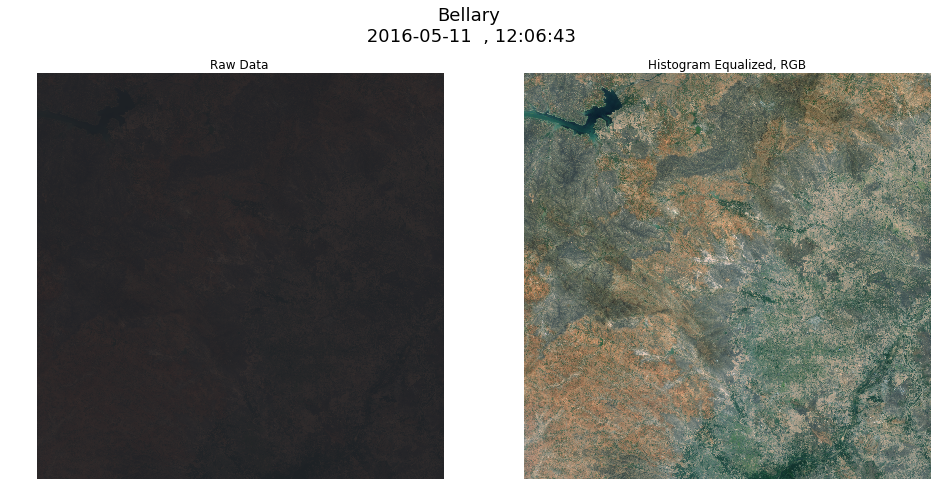

In [117]:
plt_hist_eq(img432_roi,img432_ha) # Plot Histogram Equalized image

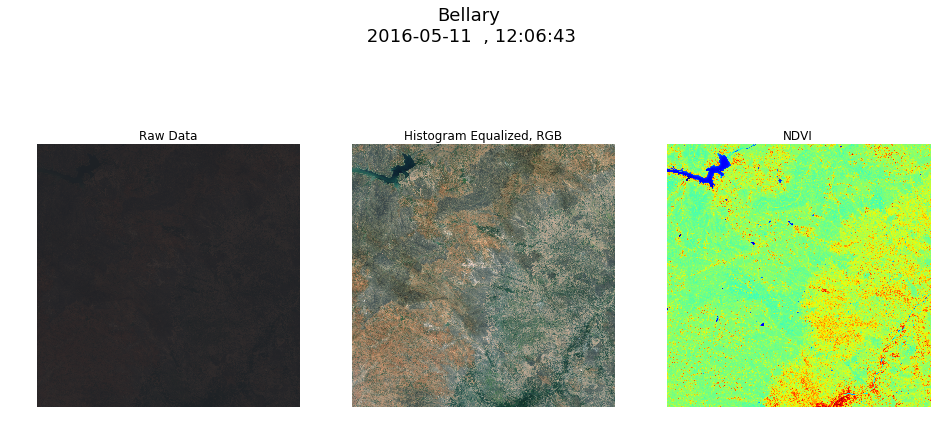

In [118]:
plt_ndvi(img432_roi,img432_ha,ndvi) # Plot NDVI

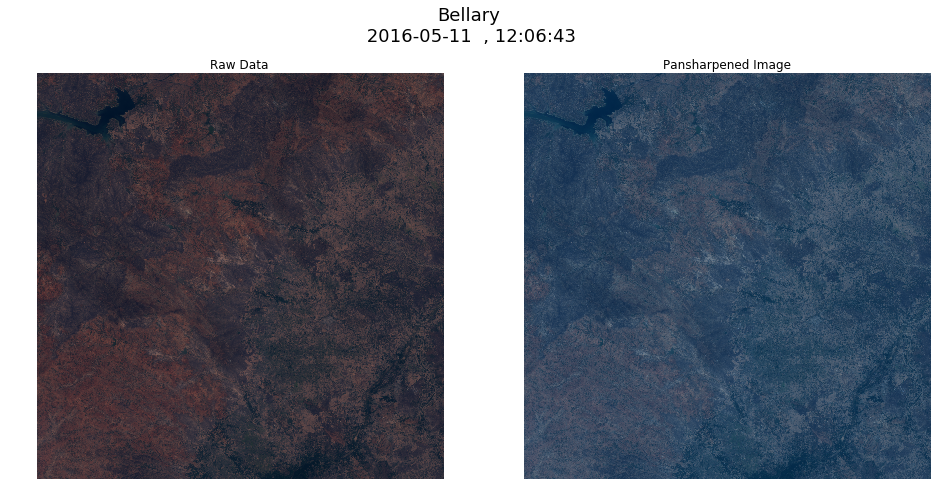

In [119]:
plt_pan_sharpen(img432_roi,img432_ps) # Plot Pan-sharpened 

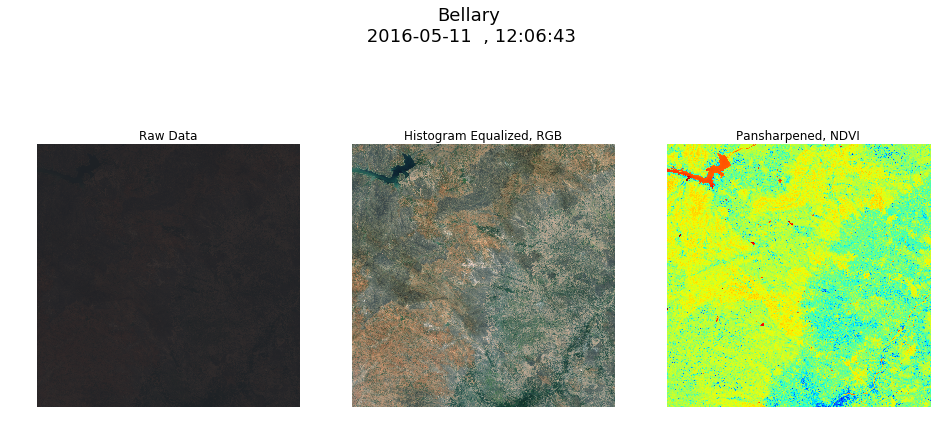

In [120]:
plt_pan_ndvi(img432_roi,img432_ha,ndvi_p) # Plot Pan-sharpened NDVI

## Unsupervised Classification, 

1. K-means Clustering [scikit-learn library]
2. Fuzzy C-means Clustering [scikit-learn library]
3. Gaussian Mixture Models
4. Self Organizing Maps

### Optimum clusters, K-means Clustering

In [47]:
from sklearn.cluster import KMeans
from scipy.cluster.vq import *
from sklearn.metrics import silhouette_samples, silhouette_score

def Silh_Kmeans(raster_flattened, n_clusters):
    i = 3
    for i in n_clusters:
        clusterer = KMeans(n_clusters=n_clusters[i], random_state=10)
        cluster_labels = clusterer.fit_predict(raster_flattened)
        
        silhouette_avg[i] = silhouette_score(raster_flattened, cluster_labels)
        silh_print = "For" + i + "clusters the avg. silhouette_score is = " + silhoutte_avg[i]
        print (silh_print)
        
        if i == 2:
            best_silhouette = silhouette_avg[i]
            cluster_no = i
        elif i > 2 and silhouette_avg[i] > best_silhouette:
            best_silhouette = silhouette_avg[i]
            cluster_no = i
        
        #sample_silhouette_values = silhouette_samples(raster_flattened, cluster_labels)
    print ('Cluster ' + cluster_no + 'has the best silhouette score of ' + best_silhouette)
    return cluster_no

### K-means Clustering

In [68]:
from scipy.cluster.vq import *
def kmeans_clustering(input_image):
    
    from sklearn.cluster import KMeans
    %matplotlib inline
    # Flatten image to get line of values
    raster_flattened = input_image.flatten()
    n_clusters = np.arange(3,17)
    #cluster_no = Silh_Kmeans(raster_flattened, n_clusters)
    cluster_no=4
    centroids, variance = kmeans(raster_flattened, cluster_no)
    code, distance = vq(raster_flattened, centroids)
    
    #Since code contains the classified values, reshape into SAR dimensions
    codeim = code.reshape(input_image.shape[0], input_image.shape[1])
    
    cluster1=np.zeros((len(centroids),1))
    for j in range(len(centroids)):
        for i in range(len(code)):
            if code[i] == j:
                cluster1[j,0]+= 1

    cluster1 = (cluster1*30*30)/(10**6)

    print 'plotting initialized...' 
    # Create figure to receive results
    plotTitle = place_name + '\n' + imageDate + '  , ' + imageTime
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle(plotTitle+'\n K-Means Classification', fontsize = 18)
   
    # In first subplot add original image
    ax = plt.subplot(121)
    plt.axis('off')
    ax.set_title('Histogram Equalized, RGB')
    plt.imshow(img432_ha)
    
    #Plot the subplot with k-means
    ax = plt.subplot(122)
    ax.set_title('KMeans '+ str(cluster_no) +' - Clusters')
    plt.axis('off')
    dcmap=plt.cm.get_cmap('jet', len(centroids))
    plt.imshow(codeim, cmap=dcmap)
    
    cb=plt.colorbar(ticks=np.arange(len(centroids)),fraction=0.046, pad=0.04)
    cb.ax.set_yticklabels(cluster1[i] for i in range(len(cluster1)) )  # horizontal colorbar
    
    #plt.show()
    plt.savefig(image_save_dir +'\\'+ place_name + '_'+ 'KMeans_Unsup'+imageDate +'_L8' +'.tiff',format='tiff', dpi=300)
    plt.savefig(image_save_dir +'\\'+ place_name + '_'+ 'KMeans_Unsup_L'+imageDate +'_L8' +'.tiff',format='tiff') 


### Fuzzy C-means Clustering

In [35]:
from scipy.cluster.vq import *

def fuz_cmeans_clustering(input_image):
    
    import skfuzzy
    %matplotlib inline
    
    # Flatten image to get line of values
    raster_flattened = input_image.flatten()
    
    #cluster_no = Silh_Kmeans(raster_flattened, n_clusters)
    cluster_no=8
    
    raster_reshaped=np.reshape(raster_flattened,(1,raster_flattened.shape[0]))
    
    print 'fuzzy k-means initialized...'
    centroids, u, u0, d, jm, p, fpc=skfuzzy.cmeans(raster_reshaped,cluster_no,2,error=0.005, maxiter=1000, init=None, seed=None)
    print 'fuzzy k-means completed...'
    
    print 'assigning classes initialized...'
    code, distance = vq(np.swapaxes(raster_reshaped,0,1), centroids)
    print 'assigning classes completed...'   
    
    #Since code contains the classified values, reshape into SAR dimensions
    
    print 'reshaping classes initialized...'    
    
    codeim = code.reshape(input_image.shape[0], input_image.shape[1])
    print 'reshaping classes completed...'   
    
    #Plot the subplot with (i+2)th k-means
    
    cluster1=np.zeros((len(centroids),1))
    for j in range(len(centroids)):
        for i in range(len(code)):
            if code[i] == j:
                cluster1[j,0]+= 1
                
    
    cluster1 = (cluster1*30*30)/(10**6)
    
    print 'plotting initialized...' 
    
    # Create figure to receive results
    plotTitle = place_name + '\n' + imageDate + '  , ' + imageTime
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle(plotTitle+'\n Fuzzy C-Means Classification', fontsize = 18)
    
    
    # In first subplot add original image
    ax = plt.subplot(121)
    plt.axis('off')
    ax.set_title('Histogram Equalized, RGB')
    plt.imshow(img432_ha)
    
    ax = plt.subplot(122)
    plt.axis('off')
    xlabel = str(1) , ' clusters'
    ax.set_title('Fuzzy KMeans '+ str(cluster_no) +'- Clusters')
    dcmap=plt.cm.get_cmap('jet', len(centroids))
    plt.imshow(codeim, cmap=dcmap)
    
    cb=plt.colorbar(ticks=np.arange(len(centroids)),fraction=0.046, pad=0.04)
    cb.ax.set_yticklabels(cluster1[i] for i in range(len(cluster1)) )  # horizontal colorbar
    
    #plt.show()
    plt.savefig(image_save_dir +'\\'+ place_name + '_'+ 'Fuzzy CMeans_Unsup8'+imageDate +'_L8' +'.tiff',format='tiff', dpi=300)
    plt.savefig(image_save_dir +'\\'+ place_name + '_'+ 'Fuzzy CMeans_Unsup_L8'+imageDate +'_L8' +'.tiff',format='tiff') 


### Optimum clusters, Gaussian Mixture Model 

In [ ]:
n_estimators = np.arange(1,16)
clfs=[GMM(n, n_iter=250).fit(raster_reshaped) for n in n_estimators]
bics=[clf.bic(raster_reshaped) for clf in clfs]
aics=[clf.aic(raster_reshaped) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC')
plt.plot(n_estimators, aics, label='AIC')
plt.legend()
plt.show()

### Gaussian Mixture Model Clustering

In [21]:
from scipy.cluster.vq import *

def GMM_clustering(input_image):

    from sklearn.mixture import GMM
    %matplotlib inline
    
    n_clusters=8
    input_image=ndvi_p
    raster_flattened = input_image.flatten()
    raster_reshaped=np.reshape(raster_flattened,(raster_flattened.shape[0],1))

    print 'GMM initialized...'
    clf=GMM(n_clusters,n_iter=500, random_state=3).fit(raster_reshaped)
    print 'GMM completed...'

    print 'VQ initialized...'
    code, distance = vq(raster_reshaped, clf.means_)
    print 'VQ completed...'

    print 'Reshaping initialized...'
    codeim = code.reshape(input_image.shape[0], input_image.shape[1])
    print 'Reshaping completed...'

    cluster1=np.zeros((len(clf.means_),1))
    for j in range(len(clf.means_)):
        for i in range(len(code)):
            if code[i] == j:
                cluster1[j,0]+= 1

    cluster1 = (cluster1*30*30)/(10**6)

    plotTitle = place_name + '\n' + imageDate + '  , ' + imageTime
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle(plotTitle+'\n Gaussian Mixture Model', fontsize = 18)
    
    
    ax = plt.subplot(121)
    plt.axis('off')
    ax.set_title('Histogram Equalized, RGB - '+ place_name)
    plt.imshow(img432_ha)

    ax = plt.subplot(122)
    plt.axis('off')
    ax.set_title('Gaussian Mixture Model '+ str(n_clusters) +' Clusters- '+ place_name)
    dcmap=plt.cm.get_cmap('jet', len(clf.means_))
    plt.imshow(codeim, cmap=dcmap)

    cb=plt.colorbar(ticks=np.arange(len(clf.means_)),fraction=0.046, pad=0.04)
    cb.ax.set_yticklabels(cluster1[i] for i in range(len(cluster1)) )  # horizontal colorbar

    plt.show()
    #plt.savefig(image_save_dir +'\\'+ place_name + '_'+ 'GMM_Unsup'+imageDate +'_L8' +'.tiff',format='tiff', dpi=300)
    #plt.savefig(image_save_dir +'\\'+ place_name + '_'+ 'GMM_Unsup_L'+imageDate +'_L8' +'.tiff',format='tiff') 

In [ ]:
from mvpa2.suite import *
q = [[1,0,0,1,1,0,1,0,1,0], [1,0,0,0,1,0,1,0,1,1], [1,0,1,0,1,0,0,0,1,0], [0,1,1,1,0,1,0,1,0,0], [1,1,0,0,1,0,1,1,1,1], [0,0,1,0,1,1,0,1,0,0], [1,1,0,1,0,1,0,0,1,0], [1,0,0,0,1,0,1,1,1,1], [0,1,1,0,1,0,1,0,0,0], [1,1,0,1,0,1,0,1,1,0]]
q2 = []
for item in q:
    ri = []
    for x in item:
        ri.append(float(x))
    q2.append(ri)

data = np.array(q2)
data_names = ['u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9', 'u10']
som = SimpleSOMMapper((10, 10), 100, learning_rate=0.05)
som.train(data)
mapped = som(data)

pl.title('DATA SOM')
pl.ylim([0,9])
pl.xlim([0,9])
for i, m in enumerate(mapped):
    print m[1],m[0],data_names[i]
    pl.text(m[1], m[0], data_names[i], ha='center', va='center',
           bbox=dict(facecolor='white', alpha=0.5, lw=0))
pl.savefig('b.png');

In [ ]:
import numpy as np
from sompy import SOM
import matplotlib.pyplot as plt

input_data = np.random.rand(10000, 3)

output_shape = (40, 40)

som_sample = SOM(output_shape, input_data)
som_sample.set_parameter(neighbor=0.1, learning_rate=0.2)
output_map_sample = som_sample.train(10000)

input_image=img_ndvi_rescaled
raster_flattened = input_image.flatten()
raster_reshaped=np.reshape(raster_flattened,(raster_flattened.shape[0],1))
som_ndvi = SOM(output_shape, raster_reshaped[0:10000,:])
som_ndvi.set_parameter(neighbor=0.1, learning_rate=0.2)
output_map_ndvi = som_ndvi.train(10000)

input_image_1=img432_ha
test1=img432_ha[:,:,0].flatten()
test2=img432_ha[:,:,1].flatten()
test3=img432_ha[:,:,2].flatten()
print test1.shape
testans=np.vstack((test1,test2,test3))
testans1=np.reshape(testans,(testans.shape[1],testans.shape[0]))
testans1.shape


#raster_flattened_1 = input_image_1.flatten()
#raster_reshaped_1=np.reshape(raster_flattened_1,(raster_flattened_1.shape[0],3))
som_ha = SOM(output_shape, testans1[:,:])
som_ha.set_parameter(neighbor=0.1, learning_rate=0.2)
output_map_ha = som_ha.train(10000)
'''
N = 500
colors = [[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 1]]
som = SOM((N, N), img_ndvi_rescaled[0:100,0:100])
som.set_parameter(neighbor=0.3)
for i in range(100):
    m = som.train(50)
img = np.array(m.tolist(), dtype=np.uint8)
fig = plt.figure()
plt.imshow(m.tolist())
plt.show()
'''

print output_map_sample.shape
print output_map_ndvi.shape
print output_map_ha.shape
#print input_data

fig = plt.figure(figsize=(16, 8))
fig.set_facecolor('white')

ax2 = fig.add_subplot(131)
ax2.imshow(output_map_sample)
plt.title('Sample Data - '+ place_name)
plt.axis('off')

#ax1 = fig.add_subplot(132)
#ax1.imshow(output_map_ndvi)
#plt.title('NDVI Map - '+ place_name)
#plt.axis('off')

ax1 = fig.add_subplot(133)
ax1.imshow(output_map_ha)
plt.title('Ha Map - '+ place_name)
plt.axis('off')
plt.show()

## MAIN PROGRAM, Unsupervised Clustering

In [ ]:
kmeans_clustering(ndvi)

In [ ]:
fuz_cmeans_clustering(ndvi)

GMM initialized...
GMM completed...
VQ initialized...
VQ completed...
Reshaping initialized...
Reshaping completed...


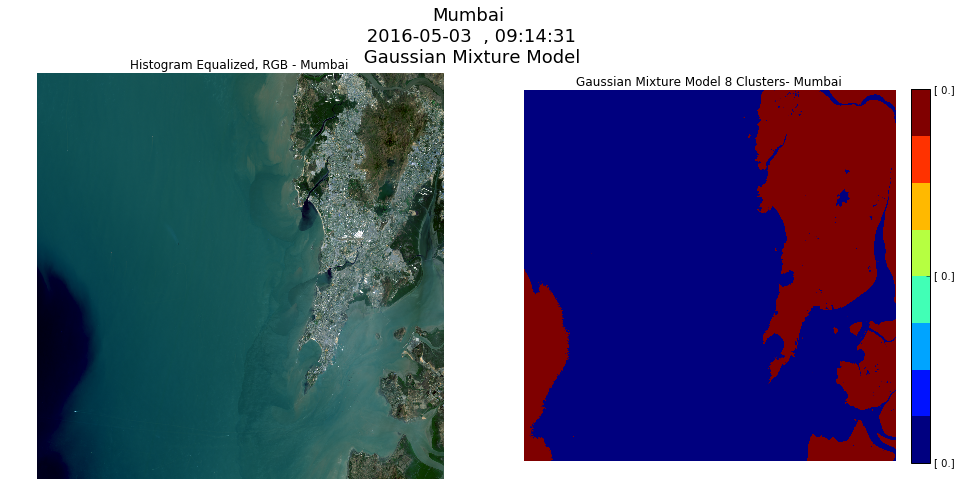

In [22]:
GMM_clustering(ndvi_p)